In [46]:
from transformers import BertTokenizer, BertModel
from file_parser import parse_reviews
import torch
import numpy as np
import sklearn

from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn import manifold


# Pretty colors
BLACK = "k"
GREEN = "#59d98e"
SEA = "#159d82"
BLUE = "#3498db"
PURPLE = "#9b59b6"
GREY = "#95a5a6"
RED = "#e74c3c"
ORANGE = "#f39c12"

In [2]:
import os
review_file_path = str(os.getcwd()) + "/restaurant_reviews.txt"

review_sentences = parse_reviews(review_file_path)

In [6]:
from bertviz import head_view
def show_head_view(model, tokenizer, sentence_a, sentence_b=None, layer=None, heads=None):
    inputs = tokenizer.encode_plus(sentence_a, sentence_b, return_tensors='pt', add_special_tokens=True)
    input_ids = inputs['input_ids']
    if sentence_b:
        token_type_ids = inputs['token_type_ids']
        attention = model(input_ids, token_type_ids=token_type_ids)[-1]
        sentence_b_start = token_type_ids[0].tolist().index(1)
    else:
        attention = model(input_ids)[-1]
        sentence_b_start = None
    input_id_list = input_ids[0].tolist() # Batch index 0
    tokens = tokenizer.convert_ids_to_tokens(input_id_list)
    
#     print(tokens)
#     print(sentence_b_start)
    
    return attention, tokens

#     head_view(attention, tokens, sentence_b_start, layer=layer, heads=heads)

In [10]:
model_v = 'bert-base-cased'

model = BertModel.from_pretrained(model_v, output_attentions=True)
tokenizer = BertTokenizer.from_pretrained(model_v, do_lower_case=False)

sentence_a = "the rabbit quickly hopped"
sentence_b = "The turtle slowly crawled"

show_head_view(model, tokenizer, sentence_a, sentence_b)

<IPython.core.display.Javascript object>

In [7]:
model_v = 'bert-base-cased'

model = BertModel.from_pretrained(model_v, output_attentions=True)
tokenizer = BertTokenizer.from_pretrained(model_v, do_lower_case=False)

sentence_a = "the rabbit quickly hopped"
sentence_b = "The turtle slowly crawled"

attention, tokens = show_head_view(model, tokenizer, sentence_a, sentence_b)

In [68]:
attention_matrix = torch.stack(tuple(attention[i][0] for i in range(len(attention))))

In [69]:
attention_matrix.size()

torch.Size([12, 12, 11, 11])

In [17]:
def save_attention_list(attention_list, filename="attention_reviews.pt"):
    torch.save(attention_list, filename)

In [14]:
def generate_attention_for_reviews(reviews):
    model_v = 'bert-base-cased'

    model = BertModel.from_pretrained(model_v, output_attentions=True)
    tokenizer = BertTokenizer.from_pretrained(model_v, do_lower_case=False)
    
    attention_list = []
    
    for sentence_id, sentence in enumerate(reviews):
        if sentence_id % 10 == 0:
            print(f"getting attention for sentence: {sentence_id}")
        attn, sentence_tokens = show_head_view(model, tokenizer, sentence)
        attention_matrix = torch.stack(tuple(attn[i][0] for i in range(len(attn))))
        
        attention_list.append({'sentence': sentence, 'attn': attention_matrix, 'tokens': sentence_tokens})
    
    return attention_list

In [15]:
attention_list = generate_attention_for_reviews(review_sentences)

getting attention for sentence: 0
getting attention for sentence: 10
getting attention for sentence: 20
getting attention for sentence: 30
getting attention for sentence: 40
getting attention for sentence: 50
getting attention for sentence: 60
getting attention for sentence: 70
getting attention for sentence: 80
getting attention for sentence: 90
getting attention for sentence: 100
getting attention for sentence: 110
getting attention for sentence: 120
getting attention for sentence: 130
getting attention for sentence: 140
getting attention for sentence: 150
getting attention for sentence: 160
getting attention for sentence: 170
getting attention for sentence: 180
getting attention for sentence: 190
getting attention for sentence: 200
getting attention for sentence: 210
getting attention for sentence: 220
getting attention for sentence: 230
getting attention for sentence: 240
getting attention for sentence: 250
getting attention for sentence: 260
getting attention for sentence: 270
get

In [80]:
attention_list[0]['sentence'], attention_list[0]['attn']

('The bread is top notch as well.',
 tensor([[[[5.7813e-01, 3.0824e-02, 3.5573e-03,  ..., 1.0350e-02,
            3.2522e-02, 3.1387e-01],
           [6.5092e-02, 3.9549e-02, 1.6236e-01,  ..., 1.1730e-01,
            8.4762e-02, 1.7892e-01],
           [6.6236e-02, 5.8628e-02, 5.7878e-02,  ..., 6.6267e-02,
            2.5112e-01, 1.0632e-01],
           ...,
           [3.6760e-01, 3.1203e-02, 4.4161e-02,  ..., 7.4649e-02,
            3.3068e-02, 1.4307e-01],
           [8.8874e-02, 5.5688e-02, 8.4803e-02,  ..., 9.4758e-02,
            7.1593e-02, 1.9455e-01],
           [2.1717e-01, 1.1268e-02, 6.3947e-03,  ..., 5.3809e-03,
            1.6511e-03, 7.4287e-01]],
 
          [[5.6472e-01, 3.6539e-02, 5.2788e-02,  ..., 4.8323e-02,
            4.9771e-02, 4.3539e-02],
           [4.3648e-02, 1.2739e-01, 9.4121e-02,  ..., 6.1968e-02,
            3.3278e-02, 5.8776e-03],
           [1.2491e-01, 1.3793e-01, 7.8979e-02,  ..., 2.1390e-02,
            1.3839e-02, 1.4328e-02],
           ...,
  

In [18]:
save_attention_list(attention_list, "large_attention_reviews.pt")

In [83]:
loading_list = torch.load('attention_reviews.pt')

In [21]:
review_sentences[:15]

['The bread is top notch as well.',
 'I have to say they have one of the fastest delivery times in the city.',
 'Food is always fresh and hot- ready to eat!',
 'Did I mention that the coffee is OUTSTANDING?',
 'Certainly not the best sushi in New York, however, it is always fresh, and the place is very clean, sterile.',
 'I trust the people at Go Sushi, it never disappoints.',
 'Straight-forward, no surprises, very decent Japanese food.',
 'BEST spicy tuna roll, great asian salad.',
 'Try the rose roll( not on menu).',
 'I love the drinks, esp lychee martini, and the food is also VERY good.',
 'In fact, this was not a Nicoise salad and was barely eatable.',
 "While there's a decent menu, it shouldn't take ten minutes to get your drinks and45 for a dessert pizza.",
 'Once we sailed, thetop-notch food and live entertainment sold us on a unforgettable evening.',
 'Our waiter was horrible; so rude and disinterested.',
 "The sangria's- watered down."]

In [38]:
width = 3
example_sep = 3
word_height = 1
pad = 0.1


def plot_attn(example, heads, disable_sep=False, disable_cls=True):
  """Plots attention maps for the given example and attention heads."""

  for ei, (layer, head) in enumerate(heads):
    yoffset = 1
    xoffset = ei * width * example_sep

    attn = example["attn"][layer][head][-15:, -15:]
    attn = attn.detach().numpy()
    attn /= attn.sum(axis=-1, keepdims=True)
    words = example["tokens"][-15:]
#     words[0] = "..."
    n_words = len(words)

    for position, word in enumerate(words):
      plt.text(xoffset + 0, yoffset - position * word_height, word,
               ha="right", va="center")
      plt.text(xoffset + width, yoffset - position * word_height, word,
               ha="left", va="center")
    if (disable_cls and disable_sep):
        for i in range(1, n_words):
          for j in range(1, n_words - 1):
            plt.plot([xoffset + pad, xoffset + width - pad],
                     [yoffset - word_height * i, yoffset - word_height * j],
                     color="blue", linewidth=1, alpha=attn[i, j])
    elif (disable_sep):
        for i in range(0, n_words -1):
          for j in range(0, n_words -1):
            plt.plot([xoffset + pad, xoffset + width - pad],
                     [yoffset - word_height * i, yoffset - word_height * j],
                     color="blue", linewidth=1, alpha=attn[i, j])
    elif (disable_cls):
        for i in range(1, n_words):
          for j in range(1, n_words):
            plt.plot([xoffset + pad, xoffset + width - pad],
                     [yoffset - word_height * i, yoffset - word_height * j],
                     color="blue", linewidth=1, alpha=attn[i, j])
    else:
        for i in range(0, n_words):
          for j in range(0, n_words):
            plt.plot([xoffset + pad, xoffset + width - pad],
                     [yoffset - word_height * i, yoffset - word_height * j],
                     color="blue", linewidth=1, alpha=attn[i, j])

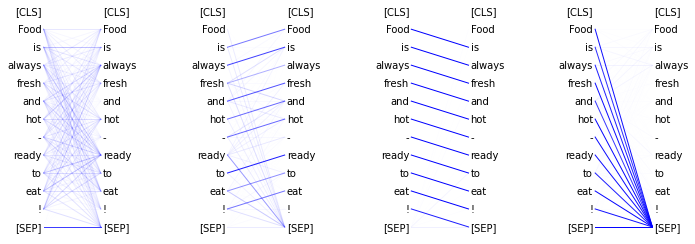

In [72]:
plt.figure(figsize=(12, 4))
plt.axis("off")
plot_attn(attention_list[2], [(0, 0), (2, 1), (2,3), (10, 5)])
plt.show()

In [68]:
print(review_sentences.index("Our waiter was horrible; so rude and disinterested."))
print(review_sentences.index("Great food but the service was dreadful!"))
print(review_sentences.index("The food was extremely tasty, creatively presented and the wine excellent."))
print(review_sentences.index("It was pleasantly uncrowded, the service was delightful, the garden adorable, the food( from appetizers to entrees) was delectable."))
print(review_sentences.index("The food is top notch, the service is attentive, and the atmosphere is great."))
print(review_sentences.index("The food was delicious and clearly fresh ingredients were used."))
print(review_sentences.index("this restaurant is absolutely beautiful."))
print(review_sentences.index("Most importantly, it is reasonably priced."))

13
17
25
34
55
63
96
108


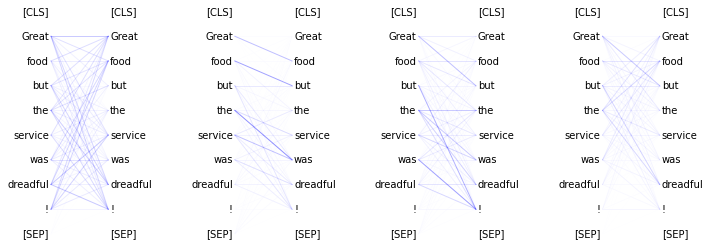

In [78]:
plt.figure(figsize=(12, 4))
plt.axis("off")
plot_attn(attention_list[17], [(0, 0), (8, 9), (8,10), (8, 7)], disable_sep=True)
plt.show()

In [45]:
n_docs = len(attention_list)
def data_iterator():
  for i, doc in enumerate(attention_list):
    if i % 100 == 0 or i == len(attention_list) - 1:
      print("{:.1f}% done".format(100.0 * (i + 1) / len(attention_list)))
    yield doc["tokens"], doc["attn"].detach().numpy()

avg_attns = {
    k: np.zeros((12, 12)) for k in [
      "self", "right", "left", "sep", "sep_sep", "rest_sep",
      "cls", "punct"]
}

print("Computing token stats")
for tokens, attns in data_iterator():
  n_tokens = attns.shape[-1]

  # create masks indicating where particular tokens are
  seps, clss, puncts = (np.zeros(n_tokens) for _ in range(3))
  for position, token in enumerate(tokens):
    if token == "[SEP]":
      seps[position] = 1
    if token == "[CLS]":
      clss[position] = 1
    if token == "." or token == ",":
      puncts[position] = 1

  # create masks indicating which positions are relevant for each key
  sep_seps = np.ones((n_tokens, n_tokens))
  sep_seps *= seps[np.newaxis]
  sep_seps *= seps[:, np.newaxis]

  rest_seps = np.ones((n_tokens, n_tokens))
  rest_seps *= (np.ones(n_tokens) - seps)[:, np.newaxis]
  rest_seps *= seps[np.newaxis]

  selectors = {
      "self": np.eye(n_tokens, n_tokens),
      "right": np.eye(n_tokens, n_tokens, 1),
      "left": np.eye(n_tokens, n_tokens, -1),
      "sep": np.tile(seps[np.newaxis], [n_tokens, 1]),
      "sep_sep": sep_seps,
      "rest_sep": rest_seps,
      "cls": np.tile(clss[np.newaxis], [n_tokens, 1]),
      "punct": np.tile(puncts[np.newaxis], [n_tokens, 1]),
  }

  # get the average attention for each token type
  for key, selector in selectors.items():
    if key == "sep_sep":
      denom = 2
    elif key == "rest_sep":
      denom = n_tokens - 2
    else:
      denom = n_tokens
    avg_attns[key] += (
        (attns * selector[np.newaxis, np.newaxis]).sum(-1).sum(-1) /
        (n_docs * denom))

Computing token stats
0.1% done
6.8% done
13.5% done
20.3% done
27.0% done
33.7% done
40.5% done
47.2% done
53.9% done
60.7% done
67.4% done
74.1% done
80.9% done
87.6% done
94.3% done
100.0% done


In [119]:
uniform_attn_entropy = 0  # entropy of uniform attention
entropies = np.zeros((12, 12))  # entropy of attention heads
entropies_cls = np.zeros((12, 12))  # entropy of attention from [CLS]

print("Computing entropy stats")
for tokens, attns in data_iterator():
  attns = 0.9999 * attns + (0.0001 / attns.shape[-1])  # smooth to avoid NaNs
  uniform_attn_entropy -= np.log(1.0 / attns.shape[-1])
  entropies -= (attns * np.log(attns)).sum(-1).mean(-1)
  entropies_cls -= (attns * np.log(attns))[:, :, 0].sum(-1)

uniform_attn_entropy /= n_docs
entropies /= n_docs
entropies_cls /= n_docs

Computing entropy stats
0.1% done
6.8% done
13.5% done
20.3% done
27.0% done
33.7% done
40.5% done
47.2% done
53.9% done
60.7% done
67.4% done
74.1% done
80.9% done
87.6% done
94.3% done
100.0% done


In [126]:
max(entropies[0])

2.705549697442488

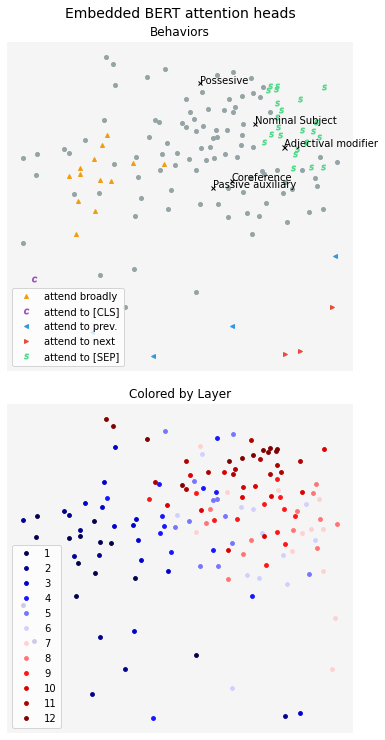

In [131]:
js_divergences = torch.load("head_distances.pt")

ENTROPY_THRESHOLD = 2.2  # When to say a head "attends broadly"
POSITION_THRESHOLD = 0.5  # When to say a head "attends to next/prev"
SPECIAL_TOKEN_THRESHOLD = 0.6  # When to say a heads attends to [CLS]/[SEP]"
# Heads that were found to have linguistic behaviors
LINGUISTIC_HEADS = {
    (4, 3): "Coreference",
    (8, 4): "Adjectival modifier",
    (9, 7): "Nominal Subject",
    (3, 9): "Passive auxiliary",
    (6, 5): "Possesive",
}

# Use multi-dimensional scaling to compute 2-dimensional embeddings that
# reflect Jenson-Shannon divergences between attention heads.
mds = sklearn.manifold.MDS(metric=True, n_init=5, n_jobs=4, eps=1e-10,
                           max_iter=1000, dissimilarity="precomputed")
pts = mds.fit_transform(js_divergences)
pts = pts.reshape((12, 12, 2))
pts_flat = pts.reshape([144, 2])

colormap = cm.seismic(np.linspace(0, 1.0, 12))
plt.figure(figsize=(4.8, 9.6))
plt.title("BERT Attention Heads")

for color_by_layer in [False, True]:
  ax = plt.subplot(2, 1, int(color_by_layer) + 1)
  seen_labels = set()
  for layer in range(12):
    for head in range(12):
      label = ""
      color = GREY
      marker = "o"
      markersize = 4
      x, y = pts[layer, head]

      if avg_attns["right"][layer, head] > POSITION_THRESHOLD:
        color = RED
        marker = ">"
        label = "attend to next"
        
      if avg_attns["left"][layer, head] > POSITION_THRESHOLD:
        color = BLUE
        label = "attend to prev."
        marker = "<"

      if avg_attns["cls"][layer, head] > SPECIAL_TOKEN_THRESHOLD:
        color = PURPLE
        label = "attend to [CLS]"
        marker = "$C$"
        markersize = 5

      if avg_attns["sep"][layer, head] > SPECIAL_TOKEN_THRESHOLD:
        color = GREEN
        marker = "$S$"
        markersize = 5
        label = "attend to [SEP]"
      if entropies[layer, head] > ENTROPY_THRESHOLD:
        color = ORANGE
        label = "attend broadly"
        marker = "^"

      if avg_attns["punct"][layer, head] > SPECIAL_TOKEN_THRESHOLD:
        color = SEA
        marker = "s"
        markersize = 3.2
        label = "attend to . and ,"

      if color_by_layer:
        label = str(layer + 1)
        color = colormap[layer]
        marker = "o"
        markersize = 3.8

      if not color_by_layer:
        if (layer, head) in LINGUISTIC_HEADS:
          label = ""
          color = BLACK
          marker = "x"
          ax.text(x, y, LINGUISTIC_HEADS[(layer, head)], color=color)

      if label not in seen_labels:
        seen_labels.add(label)
      else:
        label = ""

      ax.plot([x-0.5], [y+0.5], marker=marker, markersize=markersize,
              color=color, label=label, linestyle="")

  ax.set_xticks([])
  ax.set_yticks([])
  ax.spines["top"].set_visible(False)
  ax.spines["right"].set_visible(False)
  ax.spines["bottom"].set_visible(False)
  ax.spines["left"].set_visible(False)
  ax.set_facecolor((0.96, 0.96, 0.96))
  plt.title(("Colored by Layer" if color_by_layer else "Behaviors"))
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles, labels, loc="best")

plt.suptitle("Embedded BERT attention heads", fontsize=14, y=1.05)
plt.subplots_adjust(top=1, bottom=0, right=1, left=0,
                    hspace=0.1, wspace=0)
plt.show()

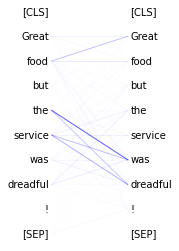

In [91]:
plt.figure(figsize=(1.5, 4))
plt.axis("off")
plot_attn(attention_list[17], [(8, 4)], disable_sep=True)
plt.show()

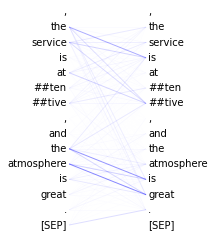

In [97]:
plt.figure(figsize=(1.5, 4))
plt.axis("off")
plot_attn(attention_list[55], [(8, 4)], disable_sep=True)
plt.show()

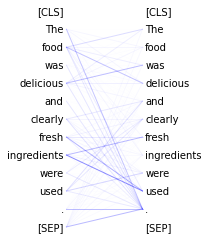

In [111]:
plt.figure(figsize=(1.5, 4))
plt.axis("off")
plot_attn(attention_list[63], [(9,7)], disable_sep=True)
plt.show()

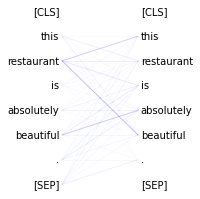

In [114]:
plt.figure(figsize=(1.5, 3))
plt.axis("off")
plot_attn(attention_list[96], [(9,7)], disable_sep=True)
plt.show()

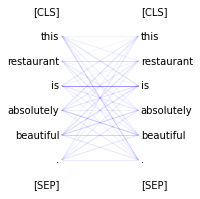

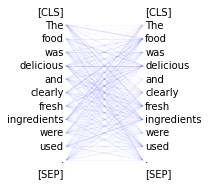

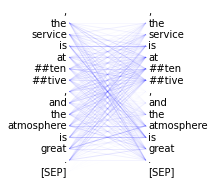

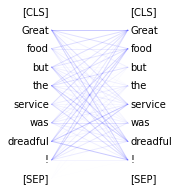

In [134]:
plt.figure(figsize=(1.5, 3))
plt.axis("off")
plot_attn(attention_list[96], [(0,0)], disable_sep=True)
plt.show()
plt.figure(figsize=(1.5, 3))
plt.axis("off")
plot_attn(attention_list[63], [(0,0)], disable_sep=True)
plt.show()
plt.figure(figsize=(1.5, 3))
plt.axis("off")
plot_attn(attention_list[55], [(0,0)], disable_sep=True)
plt.show()
plt.figure(figsize=(1.5, 3))
plt.axis("off")
plot_attn(attention_list[17], [(0,0)], disable_sep=True)
plt.show()

In [135]:
len(review_sentences)

1485